<a href="https://colab.research.google.com/github/optimopium/PyCodeReviewers/blob/main/Pandas_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

In [2]:
import pandas as pd
import numpy as np

### Creating Dataframe

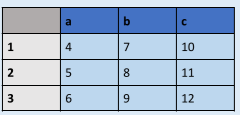

In [3]:
pd.DataFrame(data = {
    "a": [4, 5, 6],
    "b": [7, 8 , 9],
    "c": [10, 11, 12]
})

,a,b,c
0,4,7,10
1,5,8,11
2,6,9,12


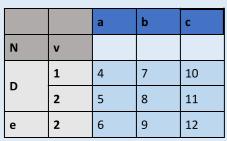

In [4]:
from collections import namedtuple
pd.DataFrame(
    data=[
        [4, 5, 6],
        [7, 8, 9],
        [10, 11, 12]
    ], 
    columns= ["a", "b", "c"], 
    index=pd.MultiIndex.from_tuples([("D", 1), ("D", 2), ("e", 2)], names=["N", "v"])
    )

a   b   c
N v            
D 1   4   5   6
  2   7   8   9
e 2  10  11  12

### Reshaping data

In [5]:
sample = pd.DataFrame(data = {
    'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
    'baz': [1, 2, 3, 4, 5, 6],
    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

sample2 = pd.DataFrame(data = {
    'foo': ['three', 'three'],
    'bar': ['A', 'B'],
    'baz': [7, 8],
    'zoo': ['x', 'y']})

sample3 = pd.DataFrame(data = {
    "boo": [11, 22, 33, 44, 55, 66]
})

In [6]:
sample

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [7]:
sample.pivot(index="foo", columns=["bar"], values=["baz", "zoo"])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [8]:
sample.melt(id_vars=["bar", "baz"])

,bar,baz,variable,value
0,A,1,foo,one
1,B,2,foo,one
2,C,3,foo,one
3,A,4,foo,two
4,B,5,foo,two
5,C,6,foo,two
6,A,1,zoo,x
7,B,2,zoo,y
8,C,3,zoo,z
9,A,4,zoo,q


In [9]:
pd.concat([sample, sample2])

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t
0,three,A,7,x
1,three,B,8,y


In [10]:
pd.concat([sample, sample3], axis=1)

,foo,bar,baz,zoo,boo
0,one,A,1,x,11
1,one,B,2,y,22
2,one,C,3,z,33
3,two,A,4,q,44
4,two,B,5,w,55
5,two,C,6,t,66


In [11]:
sample.sort_values("baz", ascending=False)

,foo,bar,baz,zoo
5,two,C,6,t
4,two,B,5,w
3,two,A,4,q
2,one,C,3,z
1,one,B,2,y
0,one,A,1,x


In [12]:
sample.rename(columns={"bar": "baar"})

,foo,baar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [13]:
sample.index = [2, 5, 1, 3, 6, 4]

In [14]:
sample

,foo,bar,baz,zoo
2,one,A,1,x
5,one,B,2,y
1,one,C,3,z
3,two,A,4,q
6,two,B,5,w
4,two,C,6,t


In [15]:
sample.sort_index()

,foo,bar,baz,zoo
1,one,C,3,z
2,one,A,1,x
3,two,A,4,q
4,two,C,6,t
5,one,B,2,y
6,two,B,5,w


In [16]:
sample

,foo,bar,baz,zoo
2,one,A,1,x
5,one,B,2,y
1,one,C,3,z
3,two,A,4,q
6,two,B,5,w
4,two,C,6,t


In [17]:
sample.reset_index(drop=True)

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [18]:
sample.drop(columns=["bar"])

,foo,baz,zoo
2,one,1,x
5,one,2,y
1,one,3,z
3,two,4,q
6,two,5,w
4,two,6,t


### Subset Selection

In [19]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
iris = pd.read_csv(url)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Rows

In [21]:
iris[iris["sepal.length"] > 7.5]

,sepal.length,sepal.width,petal.length,petal.width,variety
105,7.6,3.0,6.6,2.1,Virginica
117,7.7,3.8,6.7,2.2,Virginica
118,7.7,2.6,6.9,2.3,Virginica
122,7.7,2.8,6.7,2.0,Virginica
131,7.9,3.8,6.4,2.0,Virginica
135,7.7,3.0,6.1,2.3,Virginica


In [22]:
iris.drop_duplicates()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [23]:
iris.sample(frac=0.05)

,sepal.length,sepal.width,petal.length,petal.width,variety
4,5.0,3.6,1.4,0.2,Setosa
49,5.0,3.3,1.4,0.2,Setosa
93,5.0,2.3,3.3,1.0,Versicolor
21,5.1,3.7,1.5,0.4,Setosa
122,7.7,2.8,6.7,2.0,Virginica
32,5.2,4.1,1.5,0.1,Setosa
72,6.3,2.5,4.9,1.5,Versicolor
9,4.9,3.1,1.5,0.1,Setosa


In [24]:
iris.nlargest(3, "sepal.width")

,sepal.length,sepal.width,petal.length,petal.width,variety
15,5.7,4.4,1.5,0.4,Setosa
33,5.5,4.2,1.4,0.2,Setosa
32,5.2,4.1,1.5,0.1,Setosa


In [25]:
iris.nsmallest(2, "sepal.width")

,sepal.length,sepal.width,petal.length,petal.width,variety
60,5.0,2.0,3.5,1.0,Versicolor
62,6.0,2.2,4.0,1.0,Versicolor


In [26]:
iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [27]:
iris.tail(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


#### Columns

In [28]:
iris[["sepal.length", "variety"]]

,sepal.length,variety
0,5.1,Setosa
1,4.9,Setosa
2,4.7,Setosa
3,4.6,Setosa
4,5.0,Setosa
...,...,...
145,6.7,Virginica
146,6.3,Virginica
147,6.5,Virginica
148,6.2,Virginica


In [29]:
iris.variety

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [30]:
iris.filter(items=["variety"])

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


In [31]:
iris.loc[:3 , "variety"]

0    Setosa
1    Setosa
2    Setosa
3    Setosa
Name: variety, dtype: object

In [32]:
iris.loc[iris["sepal.length"] > 7, "variety"]

102    Virginica
105    Virginica
107    Virginica
109    Virginica
117    Virginica
118    Virginica
122    Virginica
125    Virginica
129    Virginica
130    Virginica
131    Virginica
135    Virginica
Name: variety, dtype: object

In [33]:
iris.iloc[2:6, 4]

2    Setosa
3    Setosa
4    Setosa
5    Setosa
Name: variety, dtype: object

### Summarize Data

In [34]:
iris["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [35]:
len(iris)

150

In [36]:
iris.shape

(150, 5)

In [37]:
iris["variety"].nunique()

3

In [38]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


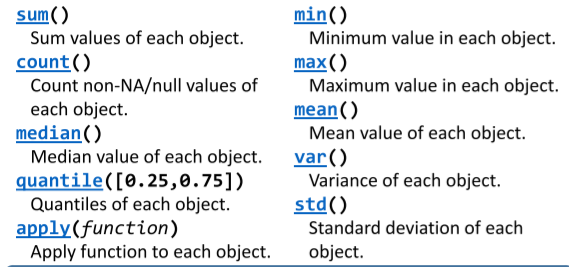

In [39]:
iris[["sepal.length", "sepal.width"]].sum()

sepal.length    876.5
sepal.width     458.6
dtype: float64

In [40]:
iris[["sepal.length", "sepal.width"]].max()

sepal.length    7.9
sepal.width     4.4
dtype: float64

### Missing Data

In [41]:
sample = pd.DataFrame(data = {
    "name": ['Alfred', 'Batman', 'Catwoman'],
    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
    "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT]})
sample

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [42]:
sample.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [43]:
sample.fillna("Filled")

,name,toy,born
0,Alfred,Filled,Filled
1,Batman,Batmobile,1940-04-25 00:00:00
2,Catwoman,Bullwhip,Filled


### New Columns

In [44]:
iris["special"] = iris["sepal.length"] > 5.5

In [45]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,special
0,5.1,3.5,1.4,0.2,Setosa,False
1,4.9,3.0,1.4,0.2,Setosa,False
2,4.7,3.2,1.3,0.2,Setosa,False
3,4.6,3.1,1.5,0.2,Setosa,False
4,5.0,3.6,1.4,0.2,Setosa,False


In [46]:
iris.assign(length = lambda df: df["sepal.length"] + 1)

,sepal.length,sepal.width,petal.length,petal.width,variety,special,length
0,5.1,3.5,1.4,0.2,Setosa,False,6.1
1,4.9,3.0,1.4,0.2,Setosa,False,5.9
2,4.7,3.2,1.3,0.2,Setosa,False,5.7
3,4.6,3.1,1.5,0.2,Setosa,False,5.6
4,5.0,3.6,1.4,0.2,Setosa,False,6.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,True,7.7
146,6.3,2.5,5.0,1.9,Virginica,True,7.3
147,6.5,3.0,5.2,2.0,Virginica,True,7.5
148,6.2,3.4,5.4,2.3,Virginica,True,7.2


### Group Data

In [47]:
iris.groupby(by="variety")

In [52]:
iris.groupby(by="variety").mean()

,sepal.length,sepal.width,petal.length,petal.width,special
variety,,,,,
Setosa,5.006,3.428,1.462,0.246,0.06
Versicolor,5.936,2.770,4.260,1.326,0.78
Virginica,6.588,2.974,5.552,2.026,0.98


In [56]:
iris.groupby(by="variety").agg(["mean", "max"])

sepal.length      sepal.width      petal.length      petal.width  \
                   mean  max        mean  max         mean  max        mean   
variety                                                                       
Setosa            5.006  5.8       3.428  4.4        1.462  1.9       0.246   
Versicolor        5.936  7.0       2.770  3.4        4.260  5.1       1.326   
Virginica         6.588  7.9       2.974  3.8        5.552  6.9       2.026   

                special        
            max    mean   max  
variety                        
Setosa      0.6    0.06  True  
Versicolor  1.8    0.78  True  
Virginica   2.5    0.98  True

In [60]:
iris.groupby(by="variety").rank(method="dense")

,sepal.length,sepal.width,petal.length,petal.width,special
0,9.0,8.0,5.0,2.0,1.0
1,7.0,3.0,5.0,2.0,1.0
2,5.0,5.0,4.0,2.0,1.0
3,4.0,4.0,6.0,2.0,1.0
4,8.0,9.0,5.0,2.0,1.0
...,...,...,...,...,...
145,12.0,7.0,6.0,10.0,2.0
146,9.0,2.0,4.0,6.0,2.0
147,11.0,7.0,6.0,7.0,2.0
148,8.0,11.0,8.0,10.0,2.0


In [62]:
iris.groupby(by="variety").rank(method="dense", pct=True)

,sepal.length,sepal.width,petal.length,petal.width,special
0,0.600000,0.500000,0.555556,0.333333,0.5
1,0.466667,0.187500,0.555556,0.333333,0.5
2,0.333333,0.312500,0.444444,0.333333,0.5
3,0.266667,0.250000,0.666667,0.333333,0.5
4,0.533333,0.562500,0.555556,0.333333,0.5
...,...,...,...,...,...
145,0.571429,0.538462,0.300000,0.833333,1.0
146,0.428571,0.153846,0.200000,0.500000,1.0
147,0.523810,0.538462,0.300000,0.583333,1.0
148,0.380952,0.846154,0.400000,0.833333,1.0


In [66]:
iris.groupby(by="variety").cummax()

,sepal.length,sepal.width,petal.length,petal.width,special
0,5.1,3.5,1.4,0.2,False
1,5.1,3.5,1.4,0.2,False
2,5.1,3.5,1.4,0.2,False
3,5.1,3.5,1.5,0.2,False
4,5.1,3.6,1.5,0.2,False
...,...,...,...,...,...
145,7.9,3.8,6.9,2.5,True
146,7.9,3.8,6.9,2.5,True
147,7.9,3.8,6.9,2.5,True
148,7.9,3.8,6.9,2.5,True


<Axes: ylabel='Frequency'>

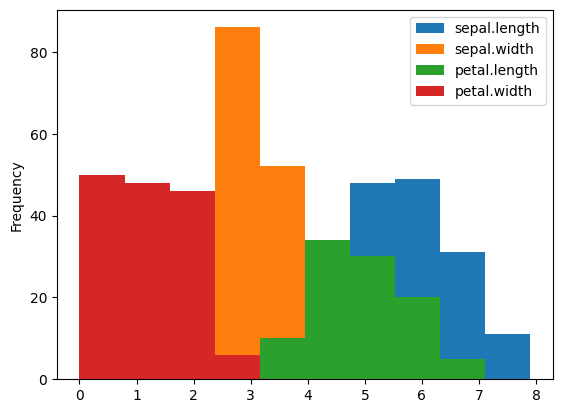

In [69]:
iris.plot.hist()

<Axes: xlabel='sepal.length', ylabel='variety'>

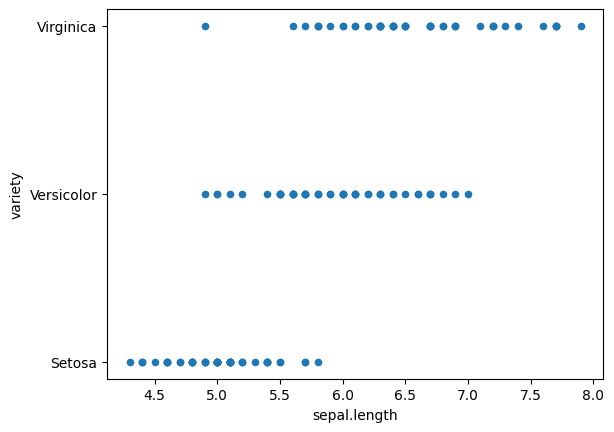

In [71]:
iris.plot.scatter(x="sepal.length", y="variety")

### Windows

In [73]:
sample = pd.DataFrame({
    'B': [0, 1, 2, np.nan, 4]},
    index = [pd.Timestamp('20130101 09:00:00'),
            pd.Timestamp('20130101 09:00:02'),
            pd.Timestamp('20130101 09:00:03'),
            pd.Timestamp('20130101 09:00:05'),
            pd.Timestamp('20130101 09:00:06')])
sample

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


In [74]:
sample.expanding(2).sum()

,B
2013-01-01 09:00:00,NaN
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,3.0
2013-01-01 09:00:06,7.0


In [75]:
sample.rolling(2).sum()

,B
2013-01-01 09:00:00,NaN
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,NaN


### Joins

In [94]:
sample1 = pd.DataFrame(data = {
    "x1": ["A", "B", "C", "E"],
    "x2": [1, 2, 3, 5]
})

sample2 = pd.DataFrame(data = {
    "x1": ["B", "C", "D", "E"],
    "x2": [3, 5, 6, 5]
})

In [95]:
sample1

,x1,x2
0,A,1
1,B,2
2,C,3
3,E,5


In [96]:
sample2

,x1,x2
0,B,3
1,C,5
2,D,6
3,E,5


In [97]:
pd.merge(sample1, sample2, how="left", on="x1")

,x1,x2_x,x2_y
0,A,1,NaN
1,B,2,3.0
2,C,3,5.0
3,E,5,5.0


In [98]:
pd.merge(sample1, sample2, how="right", on="x1")

,x1,x2_x,x2_y
0,B,2.0,3
1,C,3.0,5
2,D,NaN,6
3,E,5.0,5


In [99]:
pd.merge(sample1, sample2, how="inner", on="x1")

,x1,x2_x,x2_y
0,B,2,3
1,C,3,5
2,E,5,5


In [100]:
pd.merge(sample1, sample2, how="outer", on="x1")

,x1,x2_x,x2_y
0,A,1.0,NaN
1,B,2.0,3.0
2,C,3.0,5.0
3,E,5.0,5.0
4,D,NaN,6.0


In [101]:
sample1[sample1.x1.isin(sample2.x1)]

,x1,x2
1,B,2
2,C,3
3,E,5


In [102]:
sample1[~sample1.x1.isin(sample2.x1)]

,x1,x2
0,A,1


In [105]:
# intersection
pd.merge(sample1, sample2)

,x1,x2
0,E,5


In [106]:
# union
pd.merge(sample1, sample2, how="outer")

,x1,x2
0,A,1
1,B,2
2,C,3
3,E,5
4,B,3
5,C,5
6,D,6


In [108]:
pd.merge(sample1, sample2, how="outer", indicator=True)

,x1,x2,_merge
0,A,1,left_only
1,B,2,left_only
2,C,3,left_only
3,E,5,both
4,B,3,right_only
5,C,5,right_only
6,D,6,right_only
